In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='Adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_val = x_train[:30000]
partial_x_train = x_train[30000:]

y_val = y_train[:30000]
partial_y_train = y_train[30000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=25,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


59/59 [==============================] - 6s 80ms/step - loss: 0.7253 - accuracy: 0.7580 - val_loss: 0.4936 - val_accuracy: 0.8314
Epoch 2/25
59/59 [==============================] - 4s 70ms/step - loss: 0.4539 - accuracy: 0.8400 - val_loss: 0.4432 - val_accuracy: 0.8451
Epoch 3/25
59/59 [==============================] - 4s 67ms/step - loss: 0.3981 - accuracy: 0.8596 - val_loss: 0.4035 - val_accuracy: 0.8576
Epoch 4/25
59/59 [==============================] - 4s 67ms/step - loss: 0.3686 - accuracy: 0.8688 - val_loss: 0.3839 - val_accuracy: 0.8650
Epoch 5/25
59/59 [==============================] - 4s 62ms/step - loss: 0.3464 - accuracy: 0.8777 - val_loss: 0.3618 - val_accuracy: 0.8706
Epoch 6/25
59/59 [==============================] - 3s 59ms/step - loss: 0.3148 - accuracy: 0.8865 - val_loss: 0.3555 - val_accuracy: 0.8714
Epoch 7/25
59/59 [==============================] - 2s 35ms/step - loss: 0.3022 - accuracy: 0.8914 - val_loss: 0.3400 - val_accuracy: 0.8788
Epoch 8/25
59/59 [======

In [ ]:
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3863 - accuracy: 0.8755


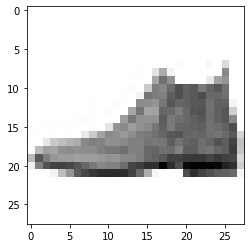

In [ ]:
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
image = x_test[0]
image = (np.expand_dims(image,0))
image.shape

(1, 28, 28)

In [ ]:
predictions = model.predict(image)
predictions

array([[1.2551801e-08, 3.9720976e-07, 1.3312285e-07, 3.8398422e-09,
        1.6546492e-08, 1.8474853e-04, 5.7276505e-08, 4.2069629e-03,
        4.8279355e-07, 9.9560720e-01]], dtype=float32)

In [ ]:
prediction = predictions[0]
np.argmax(prediction)

9